<H1> CSCI 4521: Homework 1 </H1>

In this jupyter notebook, I have looked at a csv file regarding credit limit of anonynous individuals. The individuals have been categorized as 
good (credit score $\geq 670$) or bad (credit score $< 670$). Later I have used Machine Learning (KNN model) to create classifier that takes 
variables like (limit and balance) and predicts if an individual would have a good or bad credit score.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Set the style of seaborn
plt.rcParams["mathtext.fontset"] = "cm"  # Uses Computer Modern (LaTeX default font)
plt.rcParams["font.family"] = "serif"  # Sets a serif font

<h3> 1. Data Preparation [5 pts]</h3>

<u>**Ques:**</u> Load the CSV into a DataFrame. Add a new column named “Rating_Category” to the DataFrame to classify individuals based on their credit rating. Classify the credit rating as ‘Good’ if the credit rating is $670$ or above, and ‘Poor’ if the credit rating is below $670$

In [35]:
# load your data
df = pd.read_csv("https://github.com/sziccardi/CSCI4521_DataRepository/blob/main/Credit.csv?raw=true")
names = list(df.columns) #Save column names
print(names)

# Create a new column for the rating category 
df['Rating_Category'] = df['Rating'].apply(lambda x: 'Good' if x >= 670 else 'Poor')
df['Rating_Category'] = df['Rating_Category'].map({'Poor': 0, 'Good': 1})

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Own', 'Student', 'Married', 'Region', 'Balance']


<h3>2. Data Visualization [5 pts]</h3>

<u>**Ques:**</u> Choose four features in the dataset (other than Rating) that you think may be most indicative of whether an individual has a Good or Poor credit rating. Use the Seaborn pairplot function to create a collection of pairwise scatter plots for these four features. Color the scatter plot points by the *Rating_Category* criteria

<u>**Ans:**</u> Based on hit and trials with differnt pairplots of different features, I have chosen the following 4 variables:
        
- Income (in thousands of dollars)
- Limit
- Balance
- Cards

Next we make a pariplot


<Figure size 1000x800 with 0 Axes>

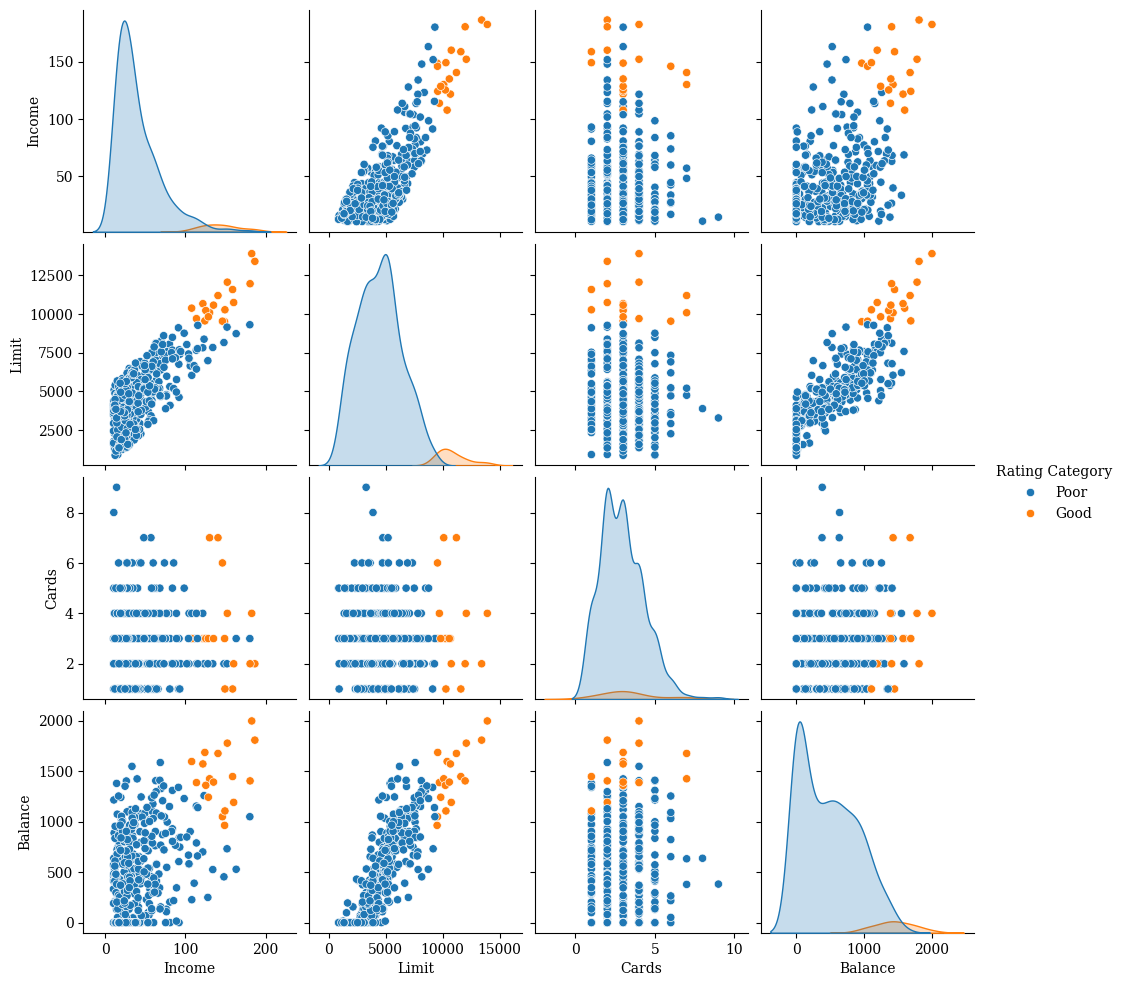

In [36]:
plt.figure(figsize=(10, 8))
g = sns.pairplot(df, vars=['Income', 'Limit', 'Cards', 'Balance'], hue='Rating_Category', hue_order=[0, 1])
for t, l in zip(g._legend.texts, ["Poor", "Good"]):
    t.set_text(l) # Update the legend labels
g._legend.set_title("Rating Category")
plt.show()

<h3>Q3. Model Evaluation [12 pts] </h3>

<u>**Ques:**</u> Write and evaluate two classifier models that predict if an individual has a good credit rating given some of the inputs of your choice (from Q2). Your models should include one model from each of the two categories below:

**Category 1 (Choose one)**
- A KNN with a small K of your choice
- A KNN with a large K of your choice

**Category 2 (Choose one)**

- A classifier that says all individuals have good credit
- A classifier which says no individuals have bad credit

<u>**Ans:**</u> I will choose Income, Limit and Balance as my variables. I will disscuss, why I have chosen them in the assingment and I will prepare the following models:
- A KNN with a small K (k = 1)
- A classifier which says no individuals have good credit

First, things first, let's use features, normalize, split and use PCA (for getting all features, down to 2 features, this helps us plot them)

In [37]:
# classify predict if an individual has a good credit rating given using Limit and Income as features using small value of k in this case we use k=1
features = ['Income', 'Limit', 'Cards']
X = df[features].values
y = df['Rating_Category'].values

# Normalize the data using z-score normalization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [38]:
# classify predict if an individual has a good credit rating given using Limit and Income as features using small value of k in this case we use k=1
features = ['Income', 'Limit', 'Cards']
X = df[features].values
y = df['Rating_Category'].values

# Normalize the data using z-score normalization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**A KNN with a small K of your choice (K=1)**

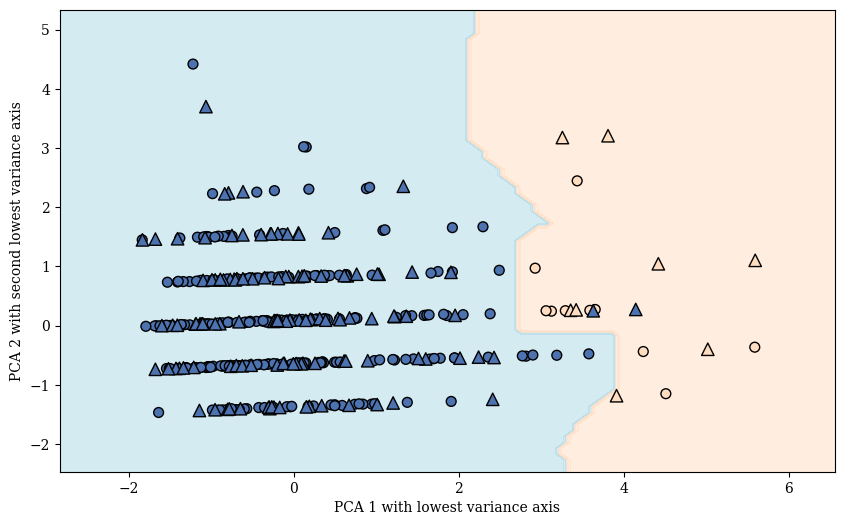

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

h = 0.1  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#ADD8E6', '#FFDDC1'])  # Light colors for the meshgrid
cmap_bold  = ListedColormap(['#4c72b0', '#FFDDC1'])  # Bold colors for the data points

plt.rcParams["mathtext.fontset"] = "cm"  # Uses Computer Modern (LaTeX default font)
plt.rcParams["font.family"] = "serif"  # Sets a serif font

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
# Plot the training data points (using circles)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train, cmap=cmap_bold, edgecolor='k',
            s=50, marker='o', label='Training Data')
# Plot the test data points (using triangles)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_test, cmap=cmap_bold, edgecolor='k',
            s=80, marker='^', label='Test Data')
plt.xlabel('PCA 1 with lowest variance axis')
plt.ylabel('PCA 2 with second lowest variance axis')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [40]:
# def knn_classifier(k):
#     def knn_classify(x_train, y_train, x_test):
#         knn = KNeighborsClassifier(n_neighbors=k)
#         knn.fit(x_train, y_train)

#         pred = knn.predict(x_test)
#         return pred
#     return knn_classify

# knn = knn_classifier(1)

# h = 0.1
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
# xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), np.arange(z_min,z_max,h))
# test_features = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]   
# z = knn(X_train, y_train, test_features)
# z = z.reshape(xx.shape)
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))



# # create a plot of income vs limit with a meshgrid of points and the predicted class for each point

# cmap_light = ListedColormap(['#ADD8E6', '#FFDDC1'])  # Light Orange & Light Blue for meshgrid
# cmap_bold  = ListedColormap(['#4c72b0', '#FFDDC1'])  # Orange & Blue for points

# fig = plt.figure() 

# # Plot decision boundary with new colors
# plt.pcolormesh(xx, yy, z[:, :, 0], cmap=cmap_light)

# # Scatter Plot of actual samples with orange & blue
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

# # Labels and title
# plt.xlabel('Income')
# plt.ylabel('Limit')
# plt.title('Income vs Limit')
# plt.show()

**Classifier which says no individuals have good credit**

Alright, we will start by making a Bad Classifier

In [41]:
class BadClassifier:
    def fit(self, X, y):
        """
        Fit the classifier.
        For the bad classifier, we don't really need to learn anything,
        """
        return self

    def predict(self, X):
        """
        Predict the class for each sample in X.
        This classifier always predicts 0.
        """
        return np.zeros(X.shape[0], dtype=int)


Good, now let's use this classifier

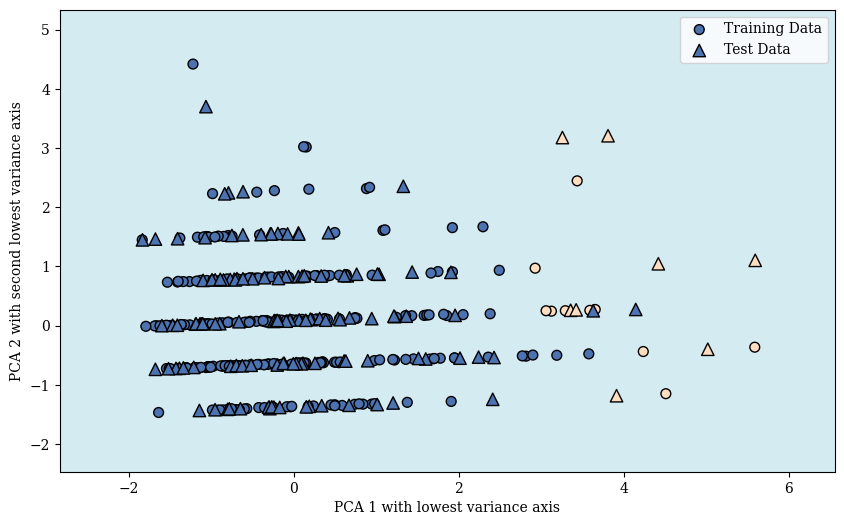

In [42]:
bad_clf = BadClassifier()
bad_clf.fit(X_train_pca, y_train)

all_points = np.vstack((X_train_pca, X_test_pca))
x_min, x_max = all_points[:, 0].min() - 1, all_points[:, 0].max() + 1
y_min, y_max = all_points[:, 1].min() - 1, all_points[:, 1].max() + 1

h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = bad_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#ADD8E6', '#FFDDC1'])  # Light colors for the meshgrid
cmap_bold  = ListedColormap(['#4c72b0', '#FFDDC1'])  # Bold colors for the data points

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train, cmap=cmap_bold, edgecolor='k',
            s=50, marker='o', label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_test, cmap=cmap_bold, edgecolor='k',
            s=80, marker='^', label='Test Data')

plt.xlabel('PCA 1 with lowest variance axis')
plt.ylabel('PCA 2 with second lowest variance axis')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()
plt.show()


In [43]:
from sklearn.metrics import classification_report, accuracy_score

print("KNN Classifier")

test_preds = knn.predict(X_test_pca)
train_preds = knn.predict(X_train_pca)

# Print overall accuracy
test_accuracy = accuracy_score(y_test, test_preds)
train_accuracy = accuracy_score(y_train, train_preds)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

# Print detailed classification report
print("\nClassification Report for Test Accuracy:")
print(classification_report(y_test, test_preds))
print("\nClassification Report for Train Accuracy:")
print(classification_report(y_train, train_preds))


KNN Classifier
Test Accuracy: 98.48%
Train Accuracy: 100.00%

Classification Report for Test Accuracy:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.80      1.00      0.89         8

    accuracy                           0.98       132
   macro avg       0.90      0.99      0.94       132
weighted avg       0.99      0.98      0.99       132


Classification Report for Train Accuracy:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00        10

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [44]:
test_preds = bad_clf.predict(X_test_pca)
train_preds = bad_clf.predict(X_train_pca)

# Print overall accuracy
test_accuracy = accuracy_score(y_test, test_preds)
train_accuracy = accuracy_score(y_train, train_preds)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

# Print detailed classification report
print("\nClassification Report for Test Accuracy:")
print(classification_report(y_test, test_preds))
print("\nClassification Report for Train Accuracy:")
print(classification_report(y_train, train_preds))

Test Accuracy: 93.94%
Train Accuracy: 96.27%

Classification Report for Test Accuracy:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       124
           1       0.00      0.00      0.00         8

    accuracy                           0.94       132
   macro avg       0.47      0.50      0.48       132
weighted avg       0.88      0.94      0.91       132


Classification Report for Train Accuracy:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       258
           1       0.00      0.00      0.00        10

    accuracy                           0.96       268
   macro avg       0.48      0.50      0.49       268
weighted avg       0.93      0.96      0.94       268



c:\Users\aksha\Documents\venvs\CSCI-4521-class-venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aksha\Documents\venvs\CSCI-4521-class-venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aksha\Documents\venvs\CSCI-4521-class-venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

<h3>Applying the Model </h3>

Consider a hypothetical consumer applying for a credit card. Their pre-approval application indicates that they have a personal income of $60,000 a year. They are a 23 year old recent graduate, so they are not a student (though they have now completed 16 total years of education), and they are not married. They rent an apartment near their office. They currently have two credit cards with a combined outstanding balance of
$1,500 out of their combined $7,500 credit limit

In [45]:
# create a column within the df dataframe for the hypothetical consumer
hypothetical_consumer = pd.DataFrame({
    'Income': [60],
    'Limit': [7500],
    'Cards': [2],
    'Age': [23],
    'Education': [16],
    'Married': [0],
    'Own': [0],
    'Balance': [1500]
})

**The region of thie person is a completely seperate problem, so we will solve it in the end.**

<H4>Determine the best value of K </h4>
First, let's determine the best value of k by taking all values of k from 1 to 50 and comparing their accuracy

In [46]:
ks = np.arange(1,51)
test_acc_list = []
train_acc_list = []
for k_cur in ks:
    test_acc = 0
    train_acc = 0
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        my_knn = KNeighborsClassifier(n_neighbors=k_cur)
        my_knn.fit(X_train, y_train)
        train_preds = my_knn.predict(X_train)
        test_preds = my_knn.predict(X_test)
        test_acc += accuracy_score(y_test, test_preds)/20
        train_acc += accuracy_score(y_train, train_preds )/20
    test_acc_list.append(test_acc)
    train_acc_list.append(train_acc)

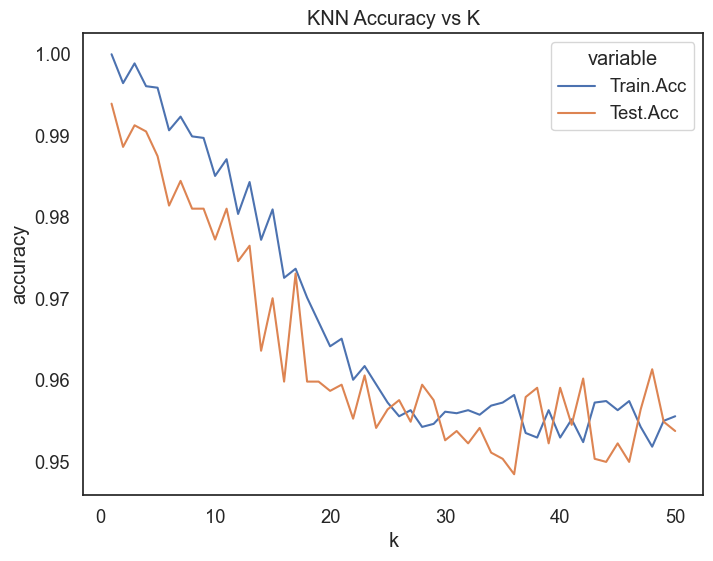

In [47]:
# helper for making a graph nicely
from pylab import rcParams
sns.set(font_scale=1.2)
sns.set_style("white") #whitegrid white dark darkgrid

rcParams['figure.figsize'] = 8, 6
result = pd.DataFrame( {"k":ks,"Train.Acc":train_acc_list,"Test.Acc":test_acc_list} )
melted_result = pd.melt(result, ['k'], var_name='variable', value_name='accuracy')
sns.lineplot(x="k", y="accuracy", hue='variable', data=melted_result)
plt.title("KNN Accuracy vs K")
plt.show()

In [48]:
# TODO: Tell me best value of k which is based on the fact that training data shoudld have the highest accuracy. Find the k for which the training accuracy is maximised
best_k = ks[np.argmax(test_acc_list)]
print(f"Best k: {best_k}")

Best k: 1


<h4> prediction the rating of hypothetical Consumer </h4>

Now, let's predict the rating using the best K, from different trials, we have noticed that best k is between 1 and 4. Now, let's predict the data. Since, I am using my hypothetical consumer as a prediction and I already know my best k value, I am going to use my entire data for training, becuase I can already test in on the consumer.

In [49]:
hypothetical_consumer_features = hypothetical_consumer[features].values

# Normalize the data using z-score normalization
hypothetical_consumer_features = (hypothetical_consumer_features - X_mean) / X_std

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, y)

pred = knn.predict(hypothetical_consumer_features)
print(f"Predicted rating: {pred}")

Predicted rating: [0]


We have seen that the predicted rating is 0. So, what can be changed to make the predicted rating 1.

<h4>Finding minimal Change for predicted rating</h4>

In [50]:
def find_minimal_change(hypothetical_consumer, knn, X_train, y_train):
    modified_consumer = hypothetical_consumer.copy()
    modified_consumer_features = modified_consumer[features].values
    modified_consumer_features = (modified_consumer_features - X_mean) / X_std

    change_delta = []
    for inc in np.arange(0, 1, 0.1):
        for lim in np.arange(0, 1, 0.1):
            for bal in np.arange(0, 1, 0.1):
                for card in np.arange(0, 1, 0.1):
                    modified_consumer_features[0][0] = modified_consumer_features[0][0] + inc
                    modified_consumer_features[0][1] = modified_consumer_features[0][1] + lim
                    modified_consumer_features[0][2] = modified_consumer_features[0][2] + bal
                    modified_consumer_features[0][3] = modified_consumer_features[0][3] + card

                    pred = knn.predict(modified_consumer_features)
                    if pred[0] == 1:
                        change_delta.append([inc, lim, bal, card])
                    modified_consumer_features[0][0] = modified_consumer_features[0][0] - inc
                    modified_consumer_features[0][1] = modified_consumer_features[0][1] - lim
                    modified_consumer_features[0][2] = modified_consumer_features[0][2] - bal
                    modified_consumer_features[0][3] = modified_consumer_features[0][3] - card
    min_dist = 100000
    for i in change_delta:
        dist = i[0]**2 + i[1]**2 + i[2]**2 + i[3]**2
        if dist < min_dist:
            min_dist = dist 
            min_change = i
    modified_consumer_features[0][0] = modified_consumer_features[0][0] + min_change[0]
    modified_consumer_features[0][1] = modified_consumer_features[0][1] + min_change[1]
    modified_consumer_features[0][2] = modified_consumer_features[0][2] + min_change[2]
    modified_consumer_features[0][3] = modified_consumer_features[0][3] + min_change[3]
    modified_consumer_features = (modified_consumer_features * X_std) + X_mean
    modified_consumer[features] = modified_consumer_features
    return modified_consumer


# Find the minimal change
modified_consumer = find_minimal_change(hypothetical_consumer, knn, X_train, y_train)
print(hypothetical_consumer)
print(modified_consumer)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
def find_minimal_change(hypothetical_consumer, knn, X_train, y_train, add_card = False):
    modified_consumer = hypothetical_consumer.copy()
    modified_consumer_features = modified_consumer[features].values
    if add_card:
        modified_consumer_features[0][3] += 1

    modified_consumer_features = (modified_consumer_features - X_mean) / X_std

    change_delta = []
    for inc in np.arange(0, 1, 0.1):
        for lim in np.arange(0, 1, 0.1):
            for bal in np.arange(0, 1, 0.1):
                modified_consumer_features[0][0] = modified_consumer_features[0][0] + inc
                modified_consumer_features[0][1] = modified_consumer_features[0][1] + lim
                modified_consumer_features[0][2] = modified_consumer_features[0][2] + bal

                pred = knn.predict(modified_consumer_features)

                if pred[0] == 1:
                    change_delta.append([inc, lim, bal])
                modified_consumer_features[0][0] = modified_consumer_features[0][0] - inc
                modified_consumer_features[0][1] = modified_consumer_features[0][1] - lim
                modified_consumer_features[0][2] = modified_consumer_features[0][2] - bal

    min_dist = 100000
    for i in change_delta:
        dist = i[0]**2 + i[1]**2 + i[2]**2 
        if dist < min_dist:
            min_dist = dist 
            min_change = i
    modified_consumer_features[0][0] = modified_consumer_features[0][0] + min_change[0]
    modified_consumer_features[0][1] = modified_consumer_features[0][1] + min_change[1]
    modified_consumer_features[0][2] = modified_consumer_features[0][2] + min_change[2]
    modified_consumer_features = (modified_consumer_features * X_std) + X_mean
    modified_consumer[features] = modified_consumer_features
    return modified_consumer

# # Find the minimal change
modified_consumer = find_minimal_change(hypothetical_consumer, knn, X_train, y_train, add_card=True)
print(hypothetical_consumer)
print(modified_consumer)

modified_consumer = find_minimal_change(hypothetical_consumer, knn, X_train, y_train, add_card=False)
print(hypothetical_consumer)
print(modified_consumer)

   Income  Limit  Cards  Age  Education  Married  Own  Balance
0      60   7500      2   23         16        0    0     1500
      Income        Limit  Cards  Age  Education  Married  Own     Balance
0  84.640133  9113.718255    3.0   23         16        0    0  1729.59191
   Income  Limit  Cards  Age  Education  Married  Own  Balance
0      60   7500      2   23         16        0    0     1500
      Income        Limit  Cards  Age  Education  Married  Own      Balance
0  88.160152  9574.780614    2.0   23         16        0    0  1637.755146


I have decided to work with 4 variables that I will alter. And here we have multiple options, 
1. If we analyse the data completely theoretically. In this case, I have considered a feature like "Cards" a floating point, rather than an integer, because it would give me the shortest stats change. In this cases, I have

<h4> Getting back to predicting region of the hypothetical person</h4>

Let's find the region of this person

In [ ]:
df['Region'] = df['Region'].map({'South': 0, 'East': 1, 'West': 2})
df['Own'] = df['Own'].map({'Yes': 1, 'No': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})

In [ ]:
# classify predict if an individual has a good credit rating given using Limit and Income as features using small value of k in this case we use k=1
Region_features = ['Own', 'Balance', 'Age', 'Married', 'Income', 'Limit']
X = df[Region_features].values
y = df['Region'].values

# Normalize the data using z-score normalization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
test_preds = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 42.42%


In [ ]:
hypothetical_consumer_features = hypothetical_consumer[Region_features].values

# Normalize the data using z-score normalization
hypothetical_consumer_features = (hypothetical_consumer_features - X_mean) / X_std

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

pred = knn.predict(hypothetical_consumer_features)
print(f"Predicted rating: {pred}")

Predicted rating: [0]


So, I can say with almost 40 - 45 % accuracy, that the region of the hypothetical person in South. 